# Multi variate time series analysis on tesla stock data

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
df=pd.read_csv('TSLA.csv',parse_dates=True)

In [183]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333   
1  2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   
2  2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   
3  2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   
4  2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   

      Volume  
0  171912000  
1   91171500  
2   72142500  
3   50277000  
4   43791000

In [184]:
df_new=df.set_index(['Date'],drop=True)
df_new.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-02-27  16.544666  16.557333  16.134001  16.415333  16.415333  171912000
2017-02-28  16.279333  16.733334  16.260000  16.666000  16.666000   91171500
2017-03-01  16.945333  16.990000  16.607332  16.667999  16.667999   72142500
2017-03-02  16.647333  16.885332  16.551332  16.698668  16.698668   50277000
2017-03-03  16.716000  16.793333  16.600000  16.771334  16.771334   43791000

In [185]:
#df_new2=df_new.index=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

In [186]:
df_new['Open']

Date
2017-02-27     16.544666
2017-02-28     16.279333
2017-03-01     16.945333
2017-03-02     16.647333
2017-03-03     16.716000
                 ...    
2022-02-16    304.683319
2022-02-17    304.420013
2022-02-18    295.333344
2022-02-22    278.043335
2022-02-23    276.809998
Name: Open, Length: 1258, dtype: float64

<AxesSubplot:>

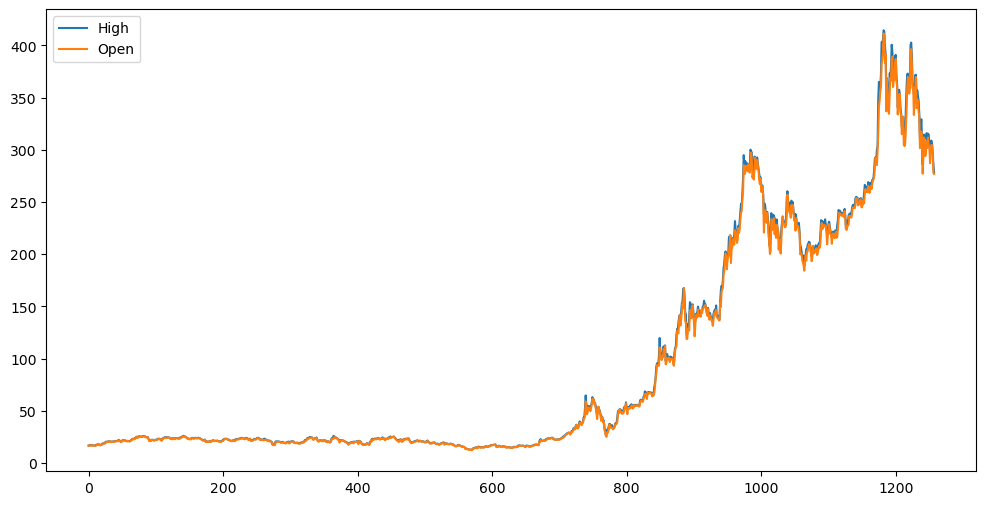

In [187]:
df[['High','Open']].plot(figsize=(12,6))

In [188]:
df[['Close','Low']].plot(figsize=(12,6))

<AxesSubplot:>

<AxesSubplot:>

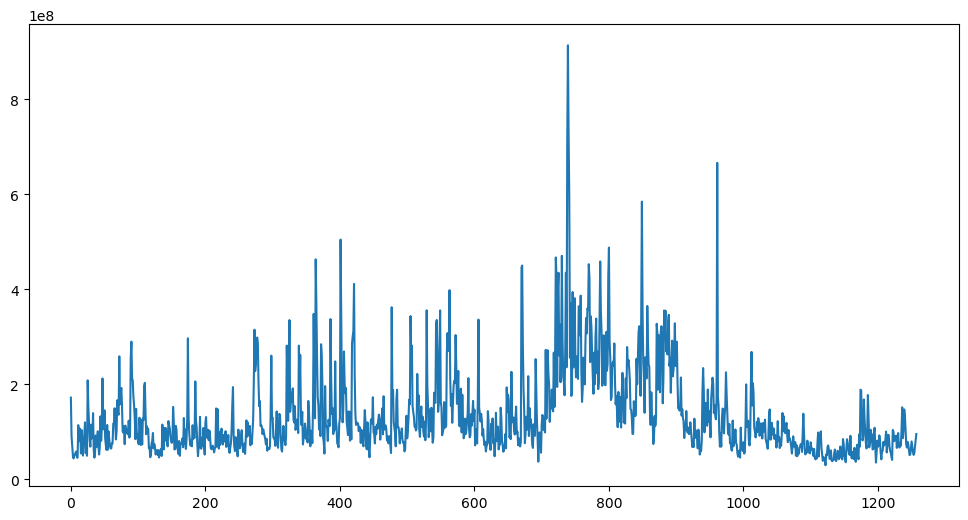

In [189]:
df['Volume'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

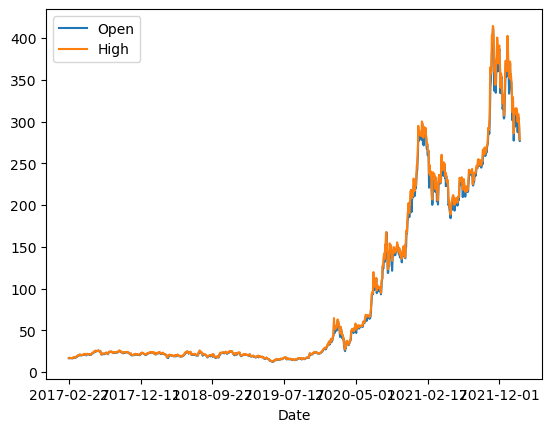

In [190]:
x=df_new.iloc[:,:2]
x.plot()

In [191]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scaled_data=scalar.fit_transform(x)

In [257]:
scaled_data

array([[0.01119522, 0.01022755],
       [0.01053088, 0.01066531],
       [0.0121984 , 0.0113037 ],
       ...,
       [0.70921976, 0.70433291],
       [0.66592945, 0.6793444 ],
       [0.66284145, 0.66157716]])

In [262]:
def df_to_X_y(df,window=6):
    X=[]
    y=[]
    df_to_array=np.array(df)
    for i in range(len(df)-window):
        row=df_to_array[i:i+window]
        X.append(row)
        col=df_to_array[i+window]
        y.append(col)
        
    return np.array(X),np.array(y)

In [263]:
x1,y1=df_to_X_y(scaled_data)

In [264]:
x1.shape

(1252, 6, 2)

In [265]:
y1.shape

(1252, 2)

In [266]:
x1

array([[[0.01119522, 0.01022755],
        [0.01053088, 0.01066531],
        [0.0121984 , 0.0113037 ],
        [0.01145227, 0.01104336],
        [0.0116242 , 0.01081454],
        [0.01115182, 0.01078138]],

       [[0.01053088, 0.01066531],
        [0.0121984 , 0.0113037 ],
        [0.01145227, 0.01104336],
        [0.0116242 , 0.01081454],
        [0.01115182, 0.01078138],
        [0.01182116, 0.01114452]],

       [[0.0121984 , 0.0113037 ],
        [0.01145227, 0.01104336],
        [0.0116242 , 0.01081454],
        [0.01115182, 0.01078138],
        [0.01182116, 0.01114452],
        [0.01099993, 0.0105111 ]],

       ...,

       [[0.72788959, 0.75154083],
        [0.72894113, 0.72845093],
        [0.68883066, 0.71429023],
        [0.72090403, 0.73428762],
        [0.73263001, 0.73713139],
        [0.73197075, 0.73055675]],

       [[0.72894113, 0.72845093],
        [0.68883066, 0.71429023],
        [0.72090403, 0.73428762],
        [0.73263001, 0.73713139],
        [0.73197075, 0.7305

In [267]:
x_train,y_train=x1[:900],y1[:900]
x_test,y_test=x1[900:],y1[900:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(900, 6, 2)
(900, 2)
(352, 6, 2)
(900, 2)


In [280]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

In [281]:
model=Sequential()

In [282]:
#model.add(Dense(units=20,,activation='sigmoid'))
model.add(LSTM(units=20,return_sequences=True,activation='tanh',input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(units=10,return_sequences=False,activation='tanh'))
#model.add(Dense(units=5,activation='sigmoid'))
model.add(Dense(units=2,activation='linear'))

In [283]:
model.compile(loss='mae',optimizer='Adam',metrics=['mean_absolute_error'])

In [284]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
29/29 [==============================] - 8s 9ms/step - loss: 0.0327 - mean_absolute_error: 0.0327
Epoch 2/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0168 - mean_absolute_error: 0.0168
Epoch 3/10
29/29 [==============================] - 0s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 4/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 5/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 6/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050
Epoch 7/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053
Epoch 8/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063
Epoch 9/10
29/29 [==============================] - 0s 10ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 10/10

In [325]:
y_test

array([[0.33762591, 0.34120351],
       [0.32145987, 0.33311997],
       [0.32309567, 0.32856831],
       [0.3234629 , 0.32453898],
       [0.32019128, 0.32546756],
       [0.33568967, 0.33301218],
       [0.32875419, 0.32935593],
       [0.3386608 , 0.34108746],
       [0.33978753, 0.34121183],
       [0.34515394, 0.3553145 ],
       [0.34559627, 0.34757916],
       [0.34904313, 0.34706514],
       [0.3421995 , 0.33964485],
       [0.33010626, 0.32700137],
       [0.32255317, 0.32799625],
       [0.33859406, 0.33817738],
       [0.32183542, 0.31965569],
       [0.31331427, 0.32203515],
       [0.32343783, 0.325965  ],
       [0.317362  , 0.31609895],
       [0.31192049, 0.31565123],
       [0.30936662, 0.30697073],
       [0.29860038, 0.30646502],
       [0.31172851, 0.3237016 ],
       [0.32916314, 0.3300275 ],
       [0.32722689, 0.33384129],
       [0.33373673, 0.33099752],
       [0.33657433, 0.34420478],
       [0.3203749 , 0.31733426],
       [0.31733698, 0.31618184],
       [0.

In [315]:
predict=model.predict(x_test)
predict

11/11 [==============================] - 0s 7ms/step


array([[0.29626116, 0.3061695 ],
       [0.29971045, 0.30972314],
       [0.30882964, 0.31955048],
       [0.31407046, 0.32513192],
       [0.31451184, 0.32554284],
       [0.31555572, 0.32669842],
       [0.31627762, 0.32759938],
       [0.31407157, 0.32528573],
       [0.31543463, 0.32684326],
       [0.31758347, 0.32915005],
       [0.3210413 , 0.33274177],
       [0.32537523, 0.33734906],
       [0.32761046, 0.33966327],
       [0.3307865 , 0.34305617],
       [0.3307717 , 0.3430786 ],
       [0.32947248, 0.3417025 ],
       [0.32657397, 0.33877206],
       [0.32310635, 0.33513802],
       [0.3182449 , 0.329891  ],
       [0.3146661 , 0.32602984],
       [0.31300858, 0.3242443 ],
       [0.3116414 , 0.3228567 ],
       [0.30667177, 0.31757948],
       [0.30427197, 0.31497094],
       [0.30313218, 0.31380802],
       [0.30156448, 0.31215197],
       [0.30253345, 0.31307763],
       [0.30524412, 0.31593236],
       [0.31006822, 0.32091796],
       [0.31564298, 0.3268911 ],
       [0.

In [288]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predict)
mae

0.06497990305544421

Text(0.5, 0, 'iteration')

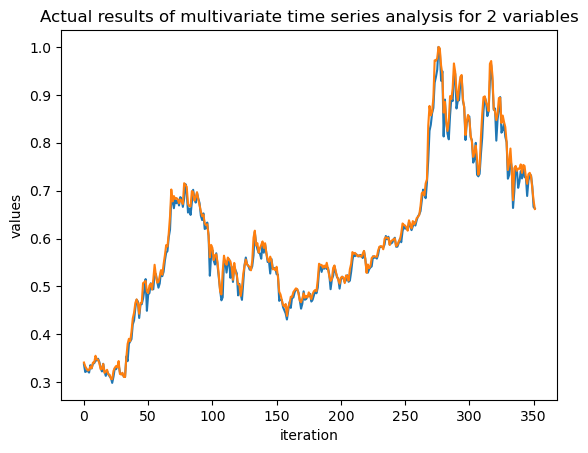

In [308]:
plt.plot(y_test)
plt.title('Actual results of multivariate time series analysis for 2 variables')
plt.ylabel('values')
plt.xlabel('iteration')

In [312]:
plt.plot(predict)
plt.title('Predicted results of multivariate time series analysis for 2 variables')
plt.ylabel('values')
plt.xlabel('iteration')

Text(0.5, 0, 'iteration')

In [314]:
plt.plot(predict)
plt.plot(y_test)
plt.title(' actual and Predicted results of multivariate time series analysis for 2 variables',)
plt.ylabel('values')
plt.xlabel('iteration')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


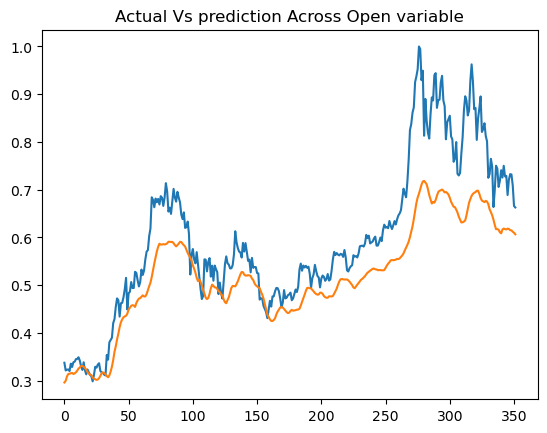

In [341]:
plt.title("Actual Vs prediction Across Open variable")
plt.plot(y_test[:,0])
plt.plot(predict[:,0])

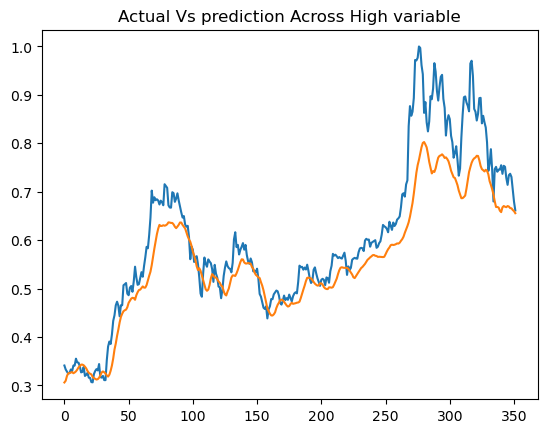

In [340]:
plt.title("Actual Vs prediction Across High variable")
plt.plot(y_test[:,1])
plt.plot(predict[:,1])

#  convert the y_test and predict values of (2D,2D) each in dataframe 

In [346]:
df_for_plotting=pd.DataFrame(data={'Actual_Open':y_test[:,0],'Actual_High':y_test[:,1],'predictions_Open':predict[:,0] ,'predictions_High':predict[:,1]})

In [347]:
df_for_plotting.head()

Actual_Open  Actual_High  predictions_Open  predictions_High
0     0.337626     0.341204          0.296261          0.306170
1     0.321460     0.333120          0.299710          0.309723
2     0.323096     0.328568          0.308830          0.319550
3     0.323463     0.324539          0.314070          0.325132
4     0.320191     0.325468          0.314512          0.325543

<AxesSubplot:>

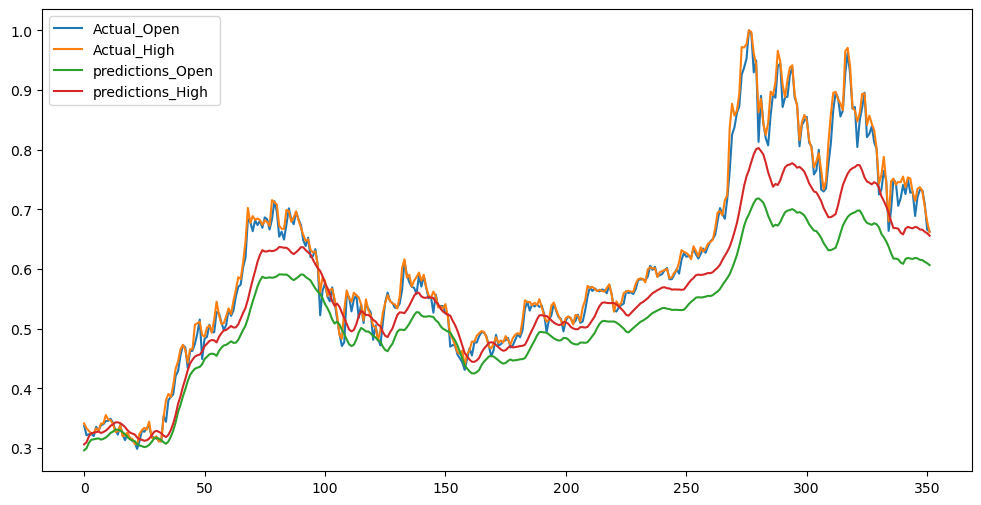

In [349]:
df_for_plotting.plot(figsize=(12,6))

# This also works (doesn't matter that much)

In [232]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your time series data with two features into a pandas DataFrame
# The columns should be named 'feature1' and 'feature2'


data = pd.read_csv('TSLA.csv')

df_new=data.set_index(['Date'],drop=True)



In [233]:
df_new

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-02-27   16.544666   16.557333   16.134001   16.415333   16.415333   
2017-02-28   16.279333   16.733334   16.260000   16.666000   16.666000   
2017-03-01   16.945333   16.990000   16.607332   16.667999   16.667999   
2017-03-02   16.647333   16.885332   16.551332   16.698668   16.698668   
2017-03-03   16.716000   16.793333   16.600000   16.771334   16.771334   
...                ...         ...         ...         ...         ...   
2022-02-16  304.683319  308.809998  300.403320  307.796661  307.796661   
2022-02-17  304.420013  306.166656  291.366669  292.116669  292.116669   
2022-02-18  295.333344  295.623322  279.203339  285.660004  285.660004   
2022-02-22  278.043335  285.576660  267.033325  273.843323  273.843323   
2022-02-23  276.809998  278.433319  253.520004  254.679993  254.679993   

               Volume  
Date                   
2017-02-27  171912000  
2017-02-28   91171500  
2017-03-01   72142500  
2017-03-02   50277000  
2017-03-03   43791000  
...               ...  
2022-02-16   51294300  
2022-02-17   55178400  
2022-02-18   68501700  
2022-02-22   83288100  
2022-02-23   95256900  

[1258 rows x 6 columns]

In [234]:
df=df_new.iloc[:,:2]
df

Open        High
Date                              
2017-02-27   16.544666   16.557333
2017-02-28   16.279333   16.733334
2017-03-01   16.945333   16.990000
2017-03-02   16.647333   16.885332
2017-03-03   16.716000   16.793333
...                ...         ...
2022-02-16  304.683319  308.809998
2022-02-17  304.420013  306.166656
2022-02-18  295.333344  295.623322
2022-02-22  278.043335  285.576660
2022-02-23  276.809998  278.433319

[1258 rows x 2 columns]

In [235]:
# Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)



In [237]:
# Define the number of previous time steps to consider for prediction
n_steps = 6

# Split the data into input features (X) and target variable (y)
X = []
y = []
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i-n_steps:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(1252, 6, 2)
(1252, 2)


In [239]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(X_train.shape)
print(y_test.shape)

(1001, 6, 2)
(251, 2)


In [241]:

# Reshape the input data to match the LSTM input shape [samples, time steps, features]
n_features = 2
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

print(X_train.shape)
print(X_test.shape)

(1001, 6, 2)
(251, 6, 2)


In [242]:

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(2))  # Adjust the number of units for the Dense layer according to your requirements

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
32/32 [==============================] - 6s 6ms/step - loss: 0.0174
Epoch 2/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 2.2912e-04
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7712e-04
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7854e-04
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7718e-04
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7123e-04
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7510e-04
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 1.7105e-04
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 1.6427e-04
Epoch 11/50
32/32 [==============================] - 0s 7ms/step - loss: 1.5761e-04
Epoch 12/50
32/32 [==============================] - 0s 6ms/step - loss: 1.6464e-04
Epoch 13/

In [247]:
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error (MSE):', mse)

# Make predictions
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)


print('Predicted:', predictions)
print('Actual:', actual_values)




Mean Squared Error (MSE): 0.0008622008026577532
8/8 [==============================] - 0s 5ms/step
Predicted: [[239.94283 243.80545]
 [237.9695  242.9252 ]
 [234.27138 238.98404]
 [235.32657 240.67252]
 [233.6449  238.97011]
 [226.24345 230.98572]
 [216.9951  221.39201]
 [209.24721 212.94447]
 [209.41103 212.87866]
 [220.1577  225.17497]
 [227.79486 234.17722]
 [225.85063 231.48099]
 [227.99652 233.39632]
 [231.403   237.08095]
 [229.53339 234.39107]
 [227.20871 232.11229]
 [222.65428 227.45036]
 [223.93883 228.99034]
 [224.45842 229.74188]
 [222.29344 227.85017]
 [216.37804 221.10953]
 [213.29195 218.05983]
 [208.62314 213.11322]
 [207.45772 212.0327 ]
 [210.98502 215.87636]
 [219.5362  225.54785]
 [226.21133 232.93373]
 [227.45003 233.83858]
 [226.85638 232.72197]
 [226.68736 232.24536]
 [225.62929 231.10359]
 [227.27654 232.79167]
 [235.12047 240.74677]
 [245.2714  251.70923]
 [246.01187 252.32384]
 [243.47185 248.96814]
 [241.53088 246.74887]
 [240.78336 245.80046]
 [240.93022 245.